In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/content/drive/MyDrive/My Assignment/drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

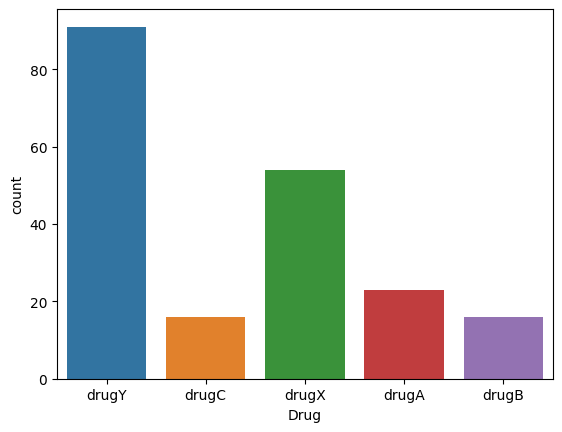

In [14]:
sns.countplot(df, x= 'Drug')
plt.show()

This chart indicate that how many type of medications are there in the dataset and the the count of all medications.

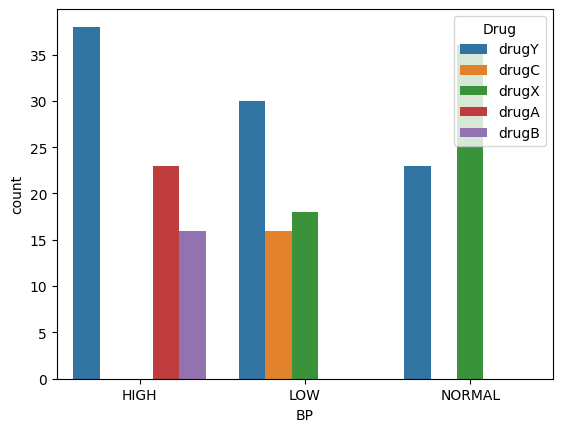

In [15]:
sns.countplot(df, x = 'BP', hue = 'Drug')
plt.show()

This chart indicates that different medications are distributed among the patients with varing blood pressure levels. Blood with normal BP are likely respond to DrugY and DrugX, Those with high BP are likely respond to DrugY, DrugA, DrugB, Those with low BP are likely respond to DrugY, DrugC, DrugX.

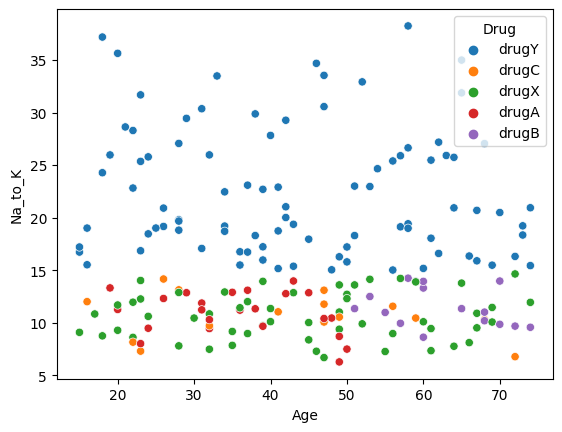

In [16]:
sns.scatterplot(df, y = 'Na_to_K', x = 'Age', hue = 'Drug')
plt.show()

The Visualization showimh the relationship between Na-to-K ration and type of drugs, the difference is clearly shown .patient with Na-to-K over 15 tend to respond only DrugY.and those with the ratio under 15 are more likely to comply with other medications.

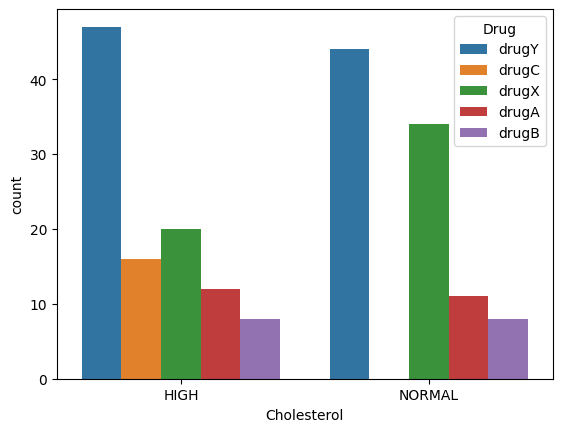

In [17]:
sns.countplot(df, x = 'Cholesterol', hue = 'Drug')
plt.show()

The bar chart shows the disribution of drug types across different Cholesterol Levels. It appears that DrugY is prescribed across all Cholestrol levels, whereas other drugs are more restricted. DrugC se likely not be prescribed to petient with normal Cholestrol level.

In [19]:
le = LabelEncoder()

In [22]:
label_sex = le.fit_transform(df['Sex'])
df.drop('Sex', axis = 1, inplace = True)
df['Sex'] = label_sex

list(le.classes_)
# F = 0 , M = 1

['F', 'M']

In [23]:
label_BP = le.fit_transform(df['BP'])
df.drop('BP', axis = 1, inplace = True)
df['BP'] = label_BP

list(le.classes_)

# High = 0, Low = 1, Normal = 2

['HIGH', 'LOW', 'NORMAL']

In [24]:
label_Cholesterol = le.fit_transform(df['Cholesterol'])
df.drop('Cholesterol', axis = 1, inplace = True)
df['Cholesterol'] = label_Cholesterol

list(le.classes_)

# High = 0, Normal = 1

['HIGH', 'NORMAL']

In [25]:
df.head()

,Age,Na_to_K,Drug,Sex,BP,Cholesterol
0,23,25.355,drugY,0,0,0
1,47,13.093,drugC,1,1,0
2,47,10.114,drugC,1,1,0
3,28,7.798,drugX,0,2,0
4,61,18.043,drugY,0,1,0


In [28]:
y = df['Drug']
X = df.drop('Drug', axis = 1)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3, random_state =1 )

In [31]:
model = DecisionTreeClassifier()

In [32]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [33]:
pred = model.predict(X_test)

In [34]:
X.columns

Index(['Age', 'Na_to_K', 'Sex', 'BP', 'Cholesterol'], dtype='object')

In [35]:
model.feature_importances_

array([0.13415846, 0.46841105, 0.        , 0.26965516, 0.12777534])

In [36]:
sorted(df["Drug"].unique())

['drugA', 'drugB', 'drugC', 'drugX', 'drugY']

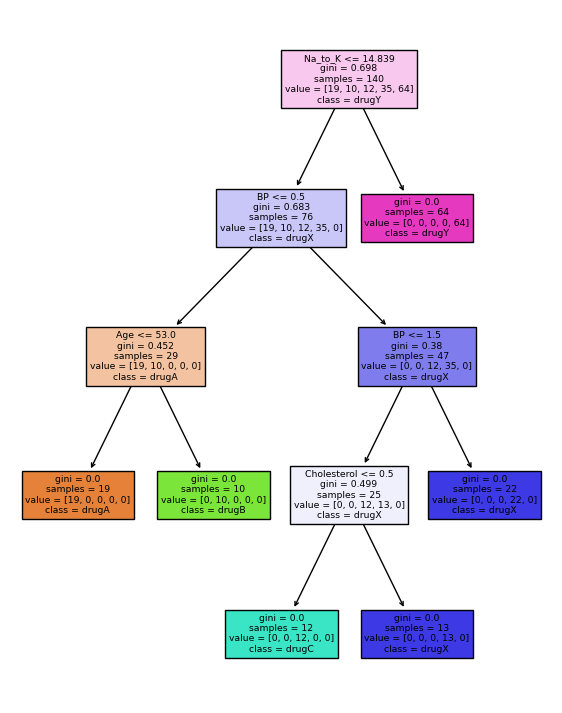

In [39]:
plt.figure(figsize = (7,9),dpi = 100)
plot_tree(model,feature_names=X.columns, class_names = sorted(df["Drug"].unique()), filled=True);

From the tree, patients with Na-to-K ratio over 14.839 respond to drugY. Those with the ratio inferior or equal to 14.839 are taken into consideration with other features.

Patients having Na-to-K ratio inferior or equal to 14.839, high level of BP (or BP = 0) and age under 53 years old react to drugA. Those satisfying the same conditions but having age over 53 years old react to drugB.

In [41]:
accuracy_score(y_test, pred)

0.9666666666666667

**I create a new patient :**

* Age : 50
* Na-to-K ratio : 30
* Sex : F (= 0)
* BP : Low (= 1)
* Cholesterol : Normal (= 1)

In [59]:
model.predict([[50, 30, 0, 1, 1]])

array(['drugY'], dtype=object)

**With these data from the new patient, the model predicted that this patient respond to drugY with over 96% of certainty.**